In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

In [16]:
# 特徴寮データをXに、ラベルデータをyに格納
# df_wineの１列目はラベルデータ２列目以降は特徴量データ
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [17]:
#データ数と各データの特徴寮の数
print(X.shape)

(178, 13)


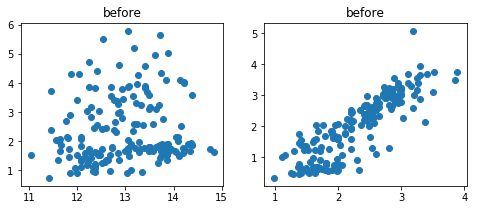

In [22]:
#標準化前のデータを可視化
#標準化によってアルコール度数やワインの色相など、単位も基準も異なる値も、様々なデータの種類も同じように扱うことができる
#plt.subplots()返り値はfigとaxesまたはaxesオブジェクトの配列
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
#?fig size
ax1.set_title('before')
ax2.set_title('before')
ax1.scatter(X[:, 0],X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()

In [25]:
print('before')
plt.subplots()
X = (X-X.mean(axis=0))/X.std(axis=0)

before


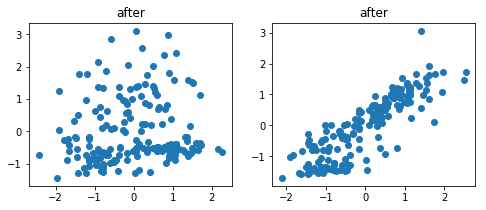

after
mean:  [ -8.38280756e-16  -1.19754394e-16  -8.37033314e-16  -3.99181312e-17
  -3.99181312e-17   0.00000000e+00  -3.99181312e-16   3.59263181e-16
  -1.19754394e-16   3.49283648e-17   1.99590656e-16   3.19345050e-16
  -1.59672525e-16] 
std:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [27]:
# 標準化後のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.set_title('after')
ax2.set_title('after')
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()
print("after")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

In [ ]:
#特徴量ごとの類似度を調べる
